In [49]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **Linear Regression**

Dataset Link: https://archive.ics.uci.edu/ml/datasets/Student+Performance

In [50]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

In [51]:
data = pd.read_csv("gdrive/My Drive/Machine_Learning/student-mat.csv", sep= ';')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [52]:
data = data[['G1', 'G2', 'G3', 'studytime', 'failures', 'absences']]
data

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4
...,...,...,...,...,...,...
390,9,9,9,2,2,11
391,14,16,16,1,0,3
392,10,8,7,1,3,3
393,11,12,10,1,0,0


In [53]:
predict = 'G3'
x = np.array(data.drop('G3', 1))
y = np.array(data[predict])

<ipython-input-53-27f543beb79f>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(data.drop('G3', 1))


In [54]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)


Train test Split Explaination:<br>
```
# >>> x_train, x_test, y_train, y_test = train_test_split(x, y)
>>> x_train
array([[15, 16],
       [21, 22],
       [11, 12],
       [17, 18],
       [13, 14],
       [ 9, 10],
       [ 1,  2],
       [ 3,  4],
       [19, 20]])
>>> x_test
array([[ 5,  6],
       [ 7,  8],
       [23, 24]])
>>> y_train
array([1, 1, 0, 1, 0, 1, 0, 1, 0])
>>> y_test
array([1, 0, 0])
```
Given two sequences, like x and y here, train_test_split() performs the split and returns four sequences (in this case NumPy arrays) in this order:<br>

1) x_train: The training part of the first sequence (x)<br>
2) x_test: The test part of the first sequence (x)<br>
3) y_train: The training part of the second sequence (y)<br>
4) y_test: The test part of the second sequence (y)<br>


In [55]:
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test)
print(acc)

0.7933263399877011


In [56]:
print("Coefficient: \n", linear.coef_)
print("Intercept: \n", linear.intercept_)

Coefficient: 
 [ 0.15868903  0.97322042 -0.15461513 -0.33849622  0.03610102]
Intercept: 
 -1.5554755561012055


In [57]:
predictions = linear.predict(x_test)

print("Order: Test Data, Prediction, Actual")
for x in range(len(predictions)):
  print(x_test[x], predictions[x], y_test[x])

Order: Test Data, Prediction, Actual
[11 13  2  0  2] 12.604941034858584 13
[16 16  2  0  2] 16.31804744979656 16
[ 6  7  2  1 15] 6.102990328911897 8
[14 15  2  0  0] 14.955246938428106 15
[ 8 10  1  0  4] 9.43602983859991 10
[7 0 2 0 0] -0.753882614464741 0
[ 9 10  3  0  0] 9.14108454618493 0
[12 13  2  0  0] 12.691428033787755 14
[6 8 1 1 0] 6.689310657439002 8
[11 11  2  0  2] 10.65850018819568 10
[15 13  2  0  9] 13.492404256021912 15
[12 12  4  0  1] 11.445078364201482 12
[12 12  1  0  2] 11.945024771158154 11
[13 13  1  0  0] 13.004732193418777 12
[10 10  2  0 17] 10.06810596132215 10
[7 7 3 0 6] 6.120651308391785 7
[ 8 12  1  0  0] 11.238066625143711 12
[8 8 1 1 4] 7.151092775535554 8
[10 10  3  2  8] 8.911589262608961 10
[8 9 2 0 4] 8.30819428462616 10
[ 8 11  2  0  0] 10.110231071169958 11
[9 9 2 0 4] 8.466883313614883 10
[ 9 11  3  0  2] 10.186506999575935 11
[11 14  1  0  6] 13.877180648951443 14
[8 9 2 0 2] 8.235992254566606 10
[10  9  2  0  0] 8.4811682824845 9
[ 6  5  1 

In [58]:
import matplotlib.pyplot as plt
import pickle
from matplotlib import style

## Saving the Model

In [59]:
# with open("studnet_model.pickel", "wb") as f:
#   pickle.dump(linear, f)

In [60]:
pick_insert = open('gdrive/My Drive/Machine_Learning/student_model.pickle','wb')
pickle.dump(linear, pick_insert)
pick_insert.close()

## Loading the Model

In [61]:
# pickle_in = open("student_model.pickel", "rb")
# LR_model = pickle.load(pickle_in)

In [62]:
pick_read = open('gdrive/My Drive/Machine_Learning/student_model.pickle','rb')
LR_model = pickle.load(pick_read)
pick_read.close()

In [63]:
# Running the model that is imported from the gdrive
predictions = LR_model.predict(x_test)

for x in range(len(predictions)):
  print("Data: ", x_test[x], "Prediction: ",predictions[x], "Actual: ", y_test[x])

Data:  [11 13  2  0  2] Prediction:  12.604941034858584 Actual:  13
Data:  [16 16  2  0  2] Prediction:  16.31804744979656 Actual:  16
Data:  [ 6  7  2  1 15] Prediction:  6.102990328911897 Actual:  8
Data:  [14 15  2  0  0] Prediction:  14.955246938428106 Actual:  15
Data:  [ 8 10  1  0  4] Prediction:  9.43602983859991 Actual:  10
Data:  [7 0 2 0 0] Prediction:  -0.753882614464741 Actual:  0
Data:  [ 9 10  3  0  0] Prediction:  9.14108454618493 Actual:  0
Data:  [12 13  2  0  0] Prediction:  12.691428033787755 Actual:  14
Data:  [6 8 1 1 0] Prediction:  6.689310657439002 Actual:  8
Data:  [11 11  2  0  2] Prediction:  10.65850018819568 Actual:  10
Data:  [15 13  2  0  9] Prediction:  13.492404256021912 Actual:  15
Data:  [12 12  4  0  1] Prediction:  11.445078364201482 Actual:  12
Data:  [12 12  1  0  2] Prediction:  11.945024771158154 Actual:  11
Data:  [13 13  1  0  0] Prediction:  13.004732193418777 Actual:  12
Data:  [10 10  2  0 17] Prediction:  10.06810596132215 Actual:  10
Dat

## Ploting

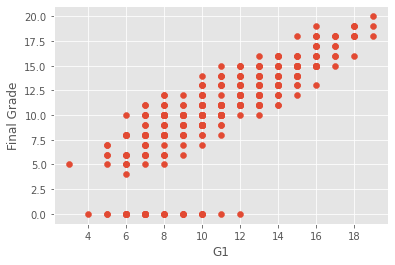

In [64]:
p = 'G1'
style.use("ggplot")
plt.scatter(data[p], data['G3'])
plt.xlabel(p)
plt.ylabel("Final Grade")
plt.show()

# **KNN Algorithm**

dataset link: https://archive.ics.uci.edu/ml/datasets/car+evaluation

In [65]:
import sklearn
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn import linear_model, preprocessing

In [66]:
data = pd.read_csv("gdrive/My Drive/Machine_Learning/car.data")
data.head()

,buying,maint,door,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Encoding

In [67]:
le = preprocessing.LabelEncoder()

buying = le.fit_transform(list(data['buying']))
maint = le.fit_transform(list(data['maint']))
door = le.fit_transform(list(data['door']))
persons = le.fit_transform(list(data['persons']))
lug_boot = le.fit_transform(list(data['lug_boot']))
safety = le.fit_transform(list(data['safety']))
label = le.fit_transform(list(data['class']))

In [68]:
x = list(zip(buying, maint, door, persons, lug_boot, safety))
y = list(label)

## Implementation

In [69]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

In [70]:
model = KNeighborsClassifier(n_neighbors= 8)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [71]:
acc = model.score(x_test, y_test)
acc

0.9075144508670521

In [72]:
predicted = model.predict(x_test)
# names = ['unacc', 'acc', 'good', 'vgood']

for x in range(len(predicted[x_test])):
  # print("Data: ",x_test[x] ,"Predicted:", names[predicted[x]], "Actual: ", names[y_test[x]])
  print("Data: ",x_test[x] ,"Predicted:", predicted[x], "Actual: ", y_test[x])
  # To get the actual distant
  # n = model.kneighbors([x_test[x], 8, True])
  # print("N: ", n)

Data:  (1, 3, 2, 1, 1, 2) Predicted: 2 Actual:  0
Data:  (1, 1, 1, 1, 0, 1) Predicted: 2 Actual:  2
Data:  (3, 0, 2, 2, 1, 0) Predicted: 2 Actual:  2
Data:  (0, 3, 3, 1, 2, 2) Predicted: 2 Actual:  2
Data:  (3, 2, 2, 2, 1, 2) Predicted: 0 Actual:  0
Data:  (1, 3, 0, 0, 0, 0) Predicted: 2 Actual:  2
Data:  (1, 0, 2, 0, 2, 2) Predicted: 2 Actual:  2
Data:  (3, 3, 2, 0, 2, 1) Predicted: 2 Actual:  2
Data:  (1, 1, 2, 1, 2, 2) Predicted: 0 Actual:  0
Data:  (1, 2, 2, 1, 2, 1) Predicted: 2 Actual:  2
Data:  (0, 1, 1, 2, 0, 1) Predicted: 2 Actual:  2
Data:  (2, 2, 0, 2, 2, 1) Predicted: 2 Actual:  2
Data:  (2, 0, 2, 1, 1, 1) Predicted: 2 Actual:  2
Data:  (3, 0, 3, 0, 1, 2) Predicted: 2 Actual:  2
Data:  (1, 1, 0, 1, 2, 0) Predicted: 1 Actual:  1
Data:  (1, 1, 2, 2, 1, 0) Predicted: 3 Actual:  3
Data:  (1, 3, 0, 2, 1, 1) Predicted: 2 Actual:  2
Data:  (3, 2, 0, 2, 0, 1) Predicted: 2 Actual:  2
Data:  (0, 0, 1, 1, 1, 2) Predicted: 2 Actual:  2
Data:  (3, 3, 0, 1, 0, 1) Predicted: 2 Actual:  2


# **Support Vector Machine (SVM)**

## Basic Idea

Source Link: https://www.youtube.com/watch?v=_YPScrckx28

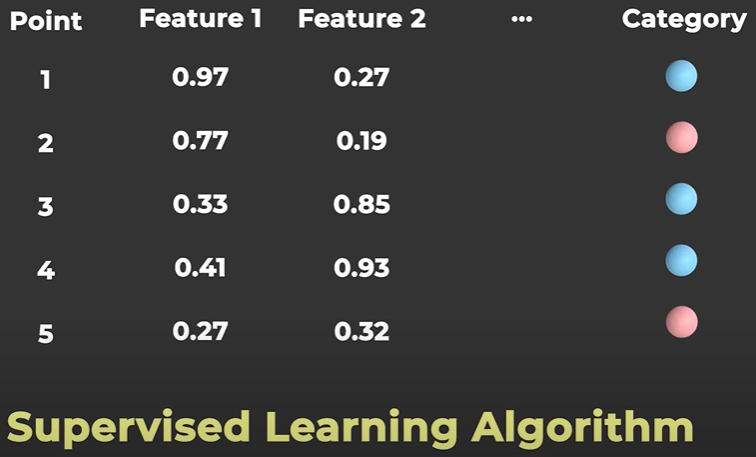

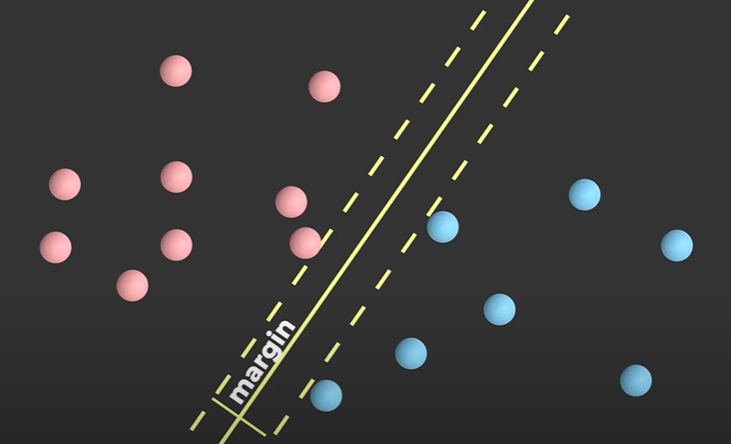

## Implementation

In [73]:
import sklearn
from sklearn import datasets
from sklearn import svm

In [74]:
iris = datasets.load_iris()

In [75]:
print("Features: ", iris.feature_names)
print("Labels: ", iris.target_names)

Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Labels:  ['setosa' 'versicolor' 'virginica']


In [76]:
x = iris.data
y = iris.target

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size= 0.2)

In [77]:
# Printing first ten values
print("Features\t\tLabels")
for i in range(10):
  print(x_train[i],'\t ', y_train[i])

Features		Labels
[4.3 3.  1.1 0.1] 	  0
[5.5 2.3 4.  1.3] 	  1
[4.9 2.4 3.3 1. ] 	  1
[6.3 2.3 4.4 1.3] 	  1
[7.7 3.  6.1 2.3] 	  2
[4.8 3.4 1.9 0.2] 	  0
[6.3 2.9 5.6 1.8] 	  2
[5.1 3.3 1.7 0.5] 	  0
[5.6 2.9 3.6 1.3] 	  1
[7.9 3.8 6.4 2. ] 	  2


In [78]:
labels = ['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica']

In [79]:
# kernals can be "rbf"(default), "linear", "poly"(takes a long time)
# degree
# C (soft-mirgin)
clf = svm.SVC(kernel="linear", C= 2)
clf.fit(x_train, y_train)

SVC(C=2, kernel='linear')

In [80]:
from sklearn import metrics

In [82]:
pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, pred)

acc

1.0